# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import math

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
573,1,45.0,27200.0,1,1
1709,1,29.0,56000.0,2,0
3046,1,38.0,24200.0,2,0
4864,0,19.0,43300.0,2,0
4251,0,18.0,25500.0,2,0
425,1,30.0,67700.0,0,0
3930,1,32.0,42900.0,1,0
3030,0,21.0,39000.0,5,0
4348,1,37.0,38600.0,3,0
2141,0,25.0,49700.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# Vamos a revisar si tenemos filas duplicadas
print(df.duplicated().sum())
print(df[df.duplicated()])
# Tenemos valores duplicados pero no necesariamente serían duplicados pueden conincidencias de diferentes personas que tiene las mismas características.

153
      gender   age   income  family_members  insurance_benefits
281        1  39.0  48100.0               1                   0
488        1  24.0  32900.0               1                   0
513        0  31.0  37400.0               2                   0
718        1  22.0  32600.0               1                   0
785        0  20.0  35800.0               0                   0
...      ...   ...      ...             ...                 ...
4793       1  24.0  37800.0               0                   0
4902       1  35.0  38700.0               1                   0
4935       1  19.0  32700.0               0                   0
4945       1  21.0  45800.0               0                   0
4965       0  22.0  40100.0               1                   0

[153 rows x 5 columns]


In [8]:
#vamos a eliminar las filas duplicadas
df = df.drop_duplicates().reset_index(drop= True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4847 non-null   int64  
 1   age                 4847 non-null   float64
 2   income              4847 non-null   float64
 3   family_members      4847 non-null   int64  
 4   insurance_benefits  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 189.5 KB
None


Detectamos que teniamos filas duplicadas, que reprentaban el 3% de nuestra base por lo que los eliminamos.

In [9]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:
df["age"] = df["age"].astype("int")


In [10]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4847 non-null   int64  
 1   age                 4847 non-null   int64  
 2   income              4847 non-null   float64
 3   family_members      4847 non-null   int64  
 4   insurance_benefits  4847 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 189.5 KB


In [11]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Al usar el método describe en el data frame, no tenemos valores anormales un ejemplo serían valores negativos. 

In [12]:
df["insurance_benefits"].value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

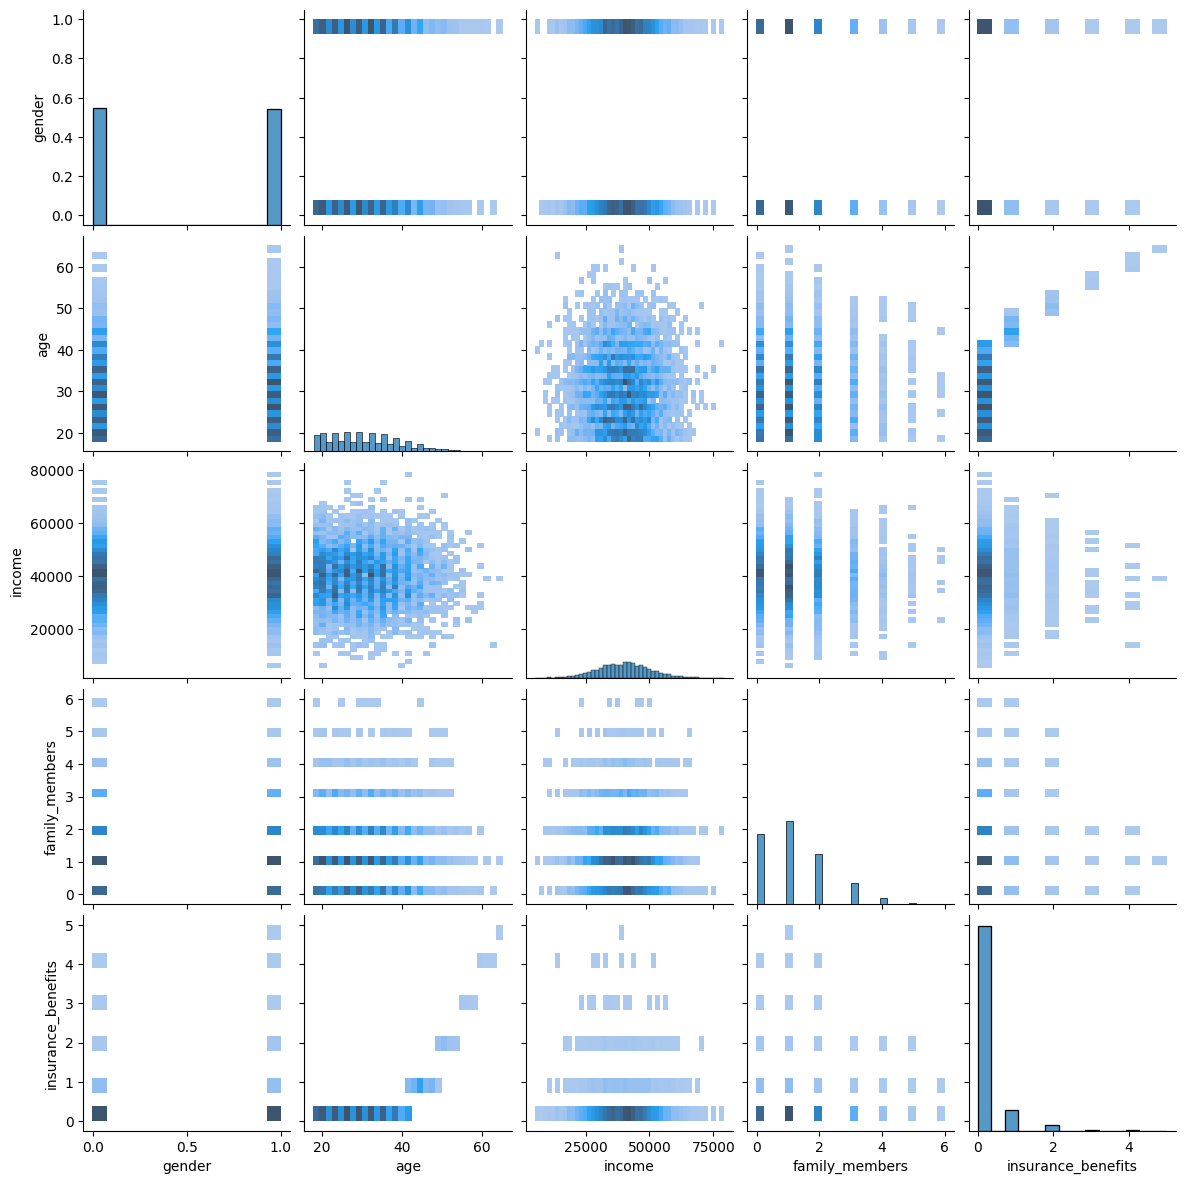

In [13]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [15]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors= k, algorithm='auto', metric= metric).fit(df[feature_names].to_numpy()) #<tu código aquí> 
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [17]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
342,0.0,0.384615,0.694937,0.166667,0
4551,0.0,0.446154,0.527848,0.000000,0
4436,0.0,0.476923,0.591139,0.000000,0
3077,0.0,0.630769,0.618987,0.000000,0
3016,0.0,0.492308,0.506329,0.166667,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [18]:
display(get_knn(df, 777, 10, "euclidean"))
display(get_knn(df, 777, 10, "manhattan"))

,gender,age,income,family_members,insurance_benefits,distance
777,1,41,48800.0,0,0,0.000000
834,1,42,48800.0,2,0,2.236068
3409,1,44,48800.0,1,1,3.162278
3039,0,35,48800.0,0,0,6.082763
1655,0,34,48800.0,1,0,7.141428
1538,0,31,48800.0,1,0,10.099505
3117,0,30,48800.0,2,0,11.224972
4394,0,28,48800.0,0,0,13.038405
2868,0,25,48800.0,1,0,16.062378
292,0,23,48800.0,2,0,18.138357


,gender,age,income,family_members,insurance_benefits,distance
777,1,41,48800.0,0,0,0.0
834,1,42,48800.0,2,0,3.0
3409,1,44,48800.0,1,1,4.0
3039,0,35,48800.0,0,0,7.0
1655,0,34,48800.0,1,0,9.0
1538,0,31,48800.0,1,0,12.0
4394,0,28,48800.0,0,0,14.0
3117,0,30,48800.0,2,0,14.0
2868,0,25,48800.0,1,0,18.0
1122,1,21,48800.0,0,0,20.0


In [19]:
display(get_knn(df, 777, 10, "manhattan"))
display(get_knn(df_scaled, 777, 10, "manhattan"))

,gender,age,income,family_members,insurance_benefits,distance
777,1,41,48800.0,0,0,0.0
834,1,42,48800.0,2,0,3.0
3409,1,44,48800.0,1,1,4.0
3039,0,35,48800.0,0,0,7.0
1655,0,34,48800.0,1,0,9.0
1538,0,31,48800.0,1,0,12.0
4394,0,28,48800.0,0,0,14.0
3117,0,30,48800.0,2,0,14.0
2868,0,25,48800.0,1,0,18.0
1122,1,21,48800.0,0,0,20.0


,gender,age,income,family_members,insurance_benefits,distance
777,1.0,0.630769,0.617722,0.0,0,0.000000
176,1.0,0.630769,0.618987,0.0,0,0.001266
1992,1.0,0.630769,0.627848,0.0,0,0.010127
1073,1.0,0.646154,0.608861,0.0,1,0.024245
18,1.0,0.646154,0.629114,0.0,1,0.026777
2606,1.0,0.630769,0.645570,0.0,0,0.027848
3514,1.0,0.646154,0.598734,0.0,1,0.034372
2220,1.0,0.661538,0.611392,0.0,1,0.037098
820,1.0,0.630769,0.656962,0.0,0,0.039241
2847,1.0,0.646154,0.593671,0.0,1,0.039435


In [20]:
display(get_knn(df_scaled, 777, 10, "euclidean"))
display(get_knn(df_scaled, 777, 10, "manhattan"))

,gender,age,income,family_members,insurance_benefits,distance
777,1.0,0.630769,0.617722,0.0,0,0.000000
176,1.0,0.630769,0.618987,0.0,0,0.001266
1992,1.0,0.630769,0.627848,0.0,0,0.010127
1073,1.0,0.646154,0.608861,0.0,1,0.017754
18,1.0,0.646154,0.629114,0.0,1,0.019143
3514,1.0,0.646154,0.598734,0.0,1,0.024438
2606,1.0,0.630769,0.645570,0.0,0,0.027848
2847,1.0,0.646154,0.593671,0.0,1,0.028550
4262,1.0,0.615385,0.592405,0.0,0,0.029624
260,1.0,0.646154,0.591139,0.0,1,0.030713


,gender,age,income,family_members,insurance_benefits,distance
777,1.0,0.630769,0.617722,0.0,0,0.000000
176,1.0,0.630769,0.618987,0.0,0,0.001266
1992,1.0,0.630769,0.627848,0.0,0,0.010127
1073,1.0,0.646154,0.608861,0.0,1,0.024245
18,1.0,0.646154,0.629114,0.0,1,0.026777
2606,1.0,0.630769,0.645570,0.0,0,0.027848
3514,1.0,0.646154,0.598734,0.0,1,0.034372
2220,1.0,0.661538,0.611392,0.0,1,0.037098
820,1.0,0.630769,0.656962,0.0,0,0.039241
2847,1.0,0.646154,0.593671,0.0,1,0.039435


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Respuesta: Sí afecta, cuando los valores están escalados se obtiene una mayo presición en los cálculos ya que su rango queda en el intervalo (-1, 1).

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Respuesta: Por lo anteriores ejemplos, vemos que hay cierta similitud entre los primeros 3 a 5 lugares despúes empieza a tener variaciones en el orden en que se situan.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [21]:
# сalcula el objetivo
df['insurance_benefits_received'] = df["insurance_benefits"] > 0
print(df['insurance_benefits_received'])

0       False
1        True
2       False
3       False
4       False
        ...  
4842    False
4843    False
4844    False
4845    False
4846    False
Name: insurance_benefits_received, Length: 4847, dtype: bool


In [22]:
# comprueba el desequilibrio de clases con value_counts()
print(df["insurance_benefits"].value_counts(normalize = True))
# <tu código aquí>

0    0.883846
1    0.087270
2    0.023520
3    0.003714
4    0.001444
5    0.000206
Name: insurance_benefits, dtype: float64


In [23]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [24]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [25]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df), seed= 42) # <tu código aquí> 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

La probabilidad: 0.12
F1: 0.13
Matriz de confusión
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

La probabilidad: 0.50
F1: 0.19
Matriz de confusión
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

La probabilidad: 1.00
F1: 0.21
Matriz de confusión
[[0.         0.88384568]
 [0.         0.11615432]]



### Ahora vamos a utilizar los datos no escalados

In [26]:
features = df[feature_names]

etiqueta = {False :0, True: 1 }
df['insurance_benefits_received'] = df['insurance_benefits_received'].map(etiqueta)

target = df["insurance_benefits_received"]

#feature_names = ['gender', 'age', 'income', 'family_members']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state= 12345)

print(features_train.shape)
print(features_test.shape)
display(target_test)

(3392, 4)
(1455, 4)


1321    0
3767    0
166     0
2935    0
423     1
       ..
1818    0
641     0
2667    0
3342    0
4708    0
Name: insurance_benefits_received, Length: 1455, dtype: int64

Hasta el momento definimos de la base de datos las caractéristicas y el objetivo. Después creamos la partición para entrenar el modelo y para la prueba.

In [27]:
for n in range(1, 11 ,1):
    model = KNeighborsClassifier(n_neighbors= n, metric= "euclidean")
    model.fit(features_train, target_train)
    predicted_test = model.predict(features_test)
    matriz_confusion = sklearn.metrics.confusion_matrix(target_test, predicted_test, normalize='all')

    print(f'Para vecinos igual a {n}')
    print(f'F1: {f1_score(target_test, predicted_test):,.2f}')
    print(f'{matriz_confusion}')
    print()

Para vecinos igual a 1
F1: 0.67
[[0.86185567 0.02268041]
 [0.04536082 0.07010309]]

Para vecinos igual a 2
F1: 0.37
[[0.87972509 0.004811  ]
 [0.08797251 0.02749141]]

Para vecinos igual a 3
F1: 0.38
[[0.87147766 0.01305842]
 [0.08522337 0.03024055]]

Para vecinos igual a 4
F1: 0.18
[[0.87972509 0.004811  ]
 [0.10378007 0.01168385]]

Para vecinos igual a 5
F1: 0.23
[[0.87766323 0.00687285]
 [0.09965636 0.01580756]]

Para vecinos igual a 6
F1: 0.06
[[8.83848797e-01 6.87285223e-04]
 [1.12027491e-01 3.43642612e-03]]

Para vecinos igual a 7
F1: 0.07
[[0.88316151 0.00137457]
 [0.11134021 0.00412371]]

Para vecinos igual a 8
F1: 0.00
[[0.88453608 0.        ]
 [0.11546392 0.        ]]

Para vecinos igual a 9
F1: 0.01
[[8.84536082e-01 0.00000000e+00]
 [1.14776632e-01 6.87285223e-04]]

Para vecinos igual a 10
F1: 0.00
[[0.88453608 0.        ]
 [0.11546392 0.        ]]



Por lo datos anteriores, podemos decir que el mejor resultado para los datos no escalados fue con el número de vecinos igual a 1, dando la métrica f1= 0.67 como mejor resultado de todos los casos.

### Ahora vamos a utilizar los datos escalados

In [28]:
features_scaled = df_scaled[feature_names]
#feature_names = ['gender', 'age', 'income', 'family_members']

features_train_scaled, features_test_scaled, target_train_scaled, target_test_scaled = train_test_split(features_scaled, target, test_size=0.3, random_state= 12345)

print(features_train_scaled.shape)
print(features_test_scaled.shape)
display(features_test_scaled)
display(target_test_scaled)

(3392, 4)
(1455, 4)


,gender,age,income,family_members
1321,1.0,0.353846,0.597468,0.000000
3767,1.0,0.492308,0.834177,0.000000
166,1.0,0.507692,0.429114,0.333333
2935,0.0,0.600000,0.244304,0.333333
423,0.0,0.707692,0.348101,0.333333
...,...,...,...,...
1818,1.0,0.292308,0.588608,0.333333
641,1.0,0.307692,0.434177,0.166667
2667,1.0,0.553846,0.810127,0.500000
3342,0.0,0.476923,0.235443,0.166667


1321    0
3767    0
166     0
2935    0
423     1
       ..
1818    0
641     0
2667    0
3342    0
4708    0
Name: insurance_benefits_received, Length: 1455, dtype: int64

In [29]:
for n in range(1, 11 ,1):
    model = KNeighborsClassifier(n_neighbors= n, metric= "euclidean")
    model.fit(features_train_scaled, target_train_scaled)
    predicted_test_scaled = model.predict(features_test_scaled)
    matriz_confusion_1 = sklearn.metrics.confusion_matrix(target_test_scaled, predicted_test_scaled, normalize='all')

    print(f'Para vecinos igual a {n}')
    print(f'F1: {f1_score(target_test_scaled, predicted_test_scaled):,.2f}')
    print(f'{matriz_confusion_1}')
    print()

Para vecinos igual a 1
F1: 0.93
[[0.87972509 0.004811  ]
 [0.01168385 0.10378007]]

Para vecinos igual a 2
F1: 0.89
[[0.88247423 0.00206186]
 [0.02199313 0.09347079]]

Para vecinos igual a 3
F1: 0.91
[[0.88041237 0.00412371]
 [0.01649485 0.09896907]]

Para vecinos igual a 4
F1: 0.88
[[0.88178694 0.00274914]
 [0.0233677  0.09209622]]

Para vecinos igual a 5
F1: 0.89
[[0.87972509 0.004811  ]
 [0.0185567  0.09690722]]

Para vecinos igual a 6
F1: 0.87
[[0.88178694 0.00274914]
 [0.02405498 0.09140893]]

Para vecinos igual a 7
F1: 0.90
[[0.88178694 0.00274914]
 [0.01924399 0.09621993]]

Para vecinos igual a 8
F1: 0.86
[[0.88178694 0.00274914]
 [0.02542955 0.09003436]]

Para vecinos igual a 9
F1: 0.87
[[0.88178694 0.00274914]
 [0.02405498 0.09140893]]

Para vecinos igual a 10
F1: 0.86
[[0.88178694 0.00274914]
 [0.02542955 0.09003436]]



Por lo anterior, usando los datos escalados vemos que usando el número de vecinos igual a 1 fue el que tuvo mejor resultado en la métrica f1 con un valor de 0.93.

En conclusión, con respecto a la métrica f1 fue mejor usar los datos escalados ya que el rango fue de (0.86, 0.93) usando las vecindades de 1 a 10. En el caso de los datos sin escalar el rango de f1 fue de (0, 0.67) usando las vecindades de 1 a 10. Esto confirma que es mejor usar los datos escalados para entrenar el modelo.

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [30]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y # <tu código aquí>

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) # <tu código aquí>
        y_pred = X2 @ self.weights # <tu código aquí>
        
        return y_pred

In [31]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

**Nota: Hay un error en r2_score ya usa la raíz cuadrada (r2_score = ***math.sqrt***(sklearn.metrics.r2_score(y_true, y_pred))**.

Lo deje porque así venía la plantilla o proyecto.

In [32]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


### Usando los datos escalados para hacer la regresión lineal con matrices

In [33]:
X_scaled = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_scaled = df['insurance_benefits'].to_numpy()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

lr_scaled = MyLinearRegression()

lr_scaled.fit(X_train_scaled, y_train_scaled)
print(lr_scaled.weights)

y_test_predicted_scaled = lr_scaled.predict(X_test_scaled)

eval_regressor(y_test_scaled, y_test_predicted_scaled)

[-0.97736673  2.32727489  0.01955949  0.04624156 -0.07297105]
RMSE: 0.36
R2: 0.66


Me dio los mismos resultados de RMSE y R2 pero el vector de los pesos son distintos.

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [34]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [35]:
X = df_pn.to_numpy()

In [36]:
print(X)

[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 ...
 [0.00e+00 2.00e+01 3.39e+04 2.00e+00]
 [1.00e+00 2.20e+01 3.27e+04 3.00e+00]
 [1.00e+00 2.80e+01 4.06e+04 1.00e+00]]


Generar una matriz aleatoria $P$.

In [37]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [38]:
print(P)

[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]


Comprobar que la matriz P sea invertible

In [39]:
print(np.linalg.det(P)) # La matriz es cuadrad y su determinante es distinto de cero, entonces la matriz es invertible
print()
P_inv= np.linalg.inv(P)
print(P_inv)
print()
print(np.linalg.det(P_inv))

0.24339135998015463

[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]

4.108609278823768


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [40]:
print(X @ P)

[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]


No, es imposible saber los valores reales de la matriz original en este caso X.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [41]:
print((X @ P) @ P_inv)
print()
print(P @ P_inv)

[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 ...
 [-1.92837871e-12  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04  3.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  4.06000000e+04  1.00000000e+00]]

[[ 1.00000000e+00 -1.69848573e-16 -7.58122972e-17 -1.13112497e-16]
 [-6.94895396e-17  1.00000000e+00 -7.10568689e-17  3.59096970e-17]
 [-1.21269339e-16 -8.01461326e-17  1.00000000e+00  4.30764008e-19]
 [-3.60694539e-16 -5.55430227e-16  3.08072404e-16  1.00000000e+00]]


Por lo anteior, dado que tenemos $X'$ y $P$ podemos calcular $P^{-1}$ inversa y luego hacer el producto $(X @ P) @$ $P^{-1}$)$.

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [42]:
a = X[0, :]
b = X[4846, :]
c = X[1234, :]
print(f'Dato original {a}')
print(f'Dato transformado {a @ P}')
print(f'Dato recuperado {a @ P @ P_inv}')
print()
print(f'Dato original {b}')
print(f'Dato transformado {b @ P}')
print(f'Dato recuperado {b @ P @ P_inv}')
print()
print(f'Dato original {c}')
print(f'Dato transformado {c @ P}')
print(f'Dato recuperado {c @ P @ P_inv}')


Dato original [1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Dato transformado [ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
Dato recuperado [1.00e+00 4.10e+01 4.96e+04 1.00e+00]

Dato original [1.00e+00 2.80e+01 4.06e+04 1.00e+00]
Dato transformado [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]
Dato recuperado [1.00e+00 2.80e+01 4.06e+04 1.00e+00]

Dato original [0.00e+00 3.50e+01 4.52e+04 1.00e+00]
Dato transformado [ 5794.67626923 20392.4139368  16787.15399908 41917.51698536]
Dato recuperado [-7.27595761e-12  3.50000000e+01  4.52000000e+04  1.00000000e+00]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Por lo que investigue, es por el tema de los puntos decimales muy cercanos a cero, por ello hay exponenciales $e$ a la algo. Esto se puede apreciar en el último ejemplo.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

**¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?**
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Los valores $w$ y $w_P$ se relacionan de la siguiente manera
$$ w_P = P^{-1}w $$

Es decir, teniendo el valor de la matriz P (invertible) y cualquiera de los valores $w$ o $w_P$ puedes tener el otro.


**Prueba analítica**

Tenemos que $$ w_P = [(XP)^T XP]^{-1} (XP)^T y $$ 

vamos a trabajar con el lado derecho de la igualdad y usar la siguiente propiedad $(AB)^T = B^TA^T$ entonces:

$$[P^{T} (X^{T} X) P]^{-1} (XP)^{T} y = [P^{T} (X^{T} X) P]^{-1} P^{T}X^{T} y $$ 

Debemos mencionar que conocemos a la matriz $P$ y está debe ser invertible así como $(X^{T} X)$, además recordemas la siguiente propiedad $(AB)^{-1} = B^{-1}A^{-1}$ entonces tnemos que:

$$[P^{T} (X^{T} X) P]^{-1} P^{T}X^{T} y = P^{-1}(X^{T} X)^{-1}(P^{T})^{-1}P^{T}X^{T} y = P^{-1}(X^{T} X)^{-1}[(P^{T})^{-1}P^{T}] X^{T} y   $$

Sabemos que $A^{-1}A = AA^{-1} = I$ por lo tanto;

$$P^{-1}(X^{T} X)^{-1}[(P^{T})^{-1}P^{T}] X^{T} y = P^{-1}(X^{T} X)^{-1} I X^{T} y = P^{-1}(X^{T} X)^{-1} X^{T} y$$

Recordar que $w = (X^T X)^{-1} X^T y$

Entonces, $$ w_P =P^{-1}(X^{T} X)^{-1} X^{T} y = P^{-1}w $$

Por lo tanto,
$$ w_P = P^{-1}w $$

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [43]:
#Vamos a crear nuestra matriz P
rng = np.random.default_rng(seed=12345)
P = rng.integers(10 ,size=(X.shape[1], X.shape[1]))
print(P)

[[6 2 7 3]
 [2 7 6 6]
 [9 3 8 3]
 [5 5 2 1]]


In [44]:
print(np.linalg.det(P)) # La matriz es cuadrad y su determinante es distinto de cero, entonces la matriz es invertible
print()
Pinv= np.linalg.inv(P)
print(Pinv)
print()
print(np.linalg.det(Pinv))

64.00000000000003

[[-1.84375   0.21875   1.578125 -0.515625]
 [ 1.4375   -0.1875   -1.28125   0.65625 ]
 [ 3.09375  -0.46875  -2.453125  0.890625]
 [-4.15625   0.78125   3.421875 -1.484375]]

0.015624999999999936


Ahora ya tenemos la matriz P invertible entonces, vamos a ofuscar los datos:

In [45]:
X_P = X @ P
print(X_P)
print(P)

[[446493. 149094. 397055. 149050.]
 [342097. 114327. 304278. 114277.]
 [189058.  63203. 168174.  63174.]
 ...
 [305150. 101850. 271324. 101822.]
 [294365.  98271. 261745.  98238.]
 [365467. 122003. 324977. 121972.]]
[[6 2 7 3]
 [2 7 6 6]
 [9 3 8 3]
 [5 5 2 1]]


In [46]:
# Recordar que y = df['insurance_benefits'].to_numpy() and 


Para hacer la regresión lineal vamos a ocupar la clase definida como MyLinearRegression

### Regresión lineal con los datos ofuscados

In [47]:
X_P_train, X_P_test, y_train, y_test = train_test_split(X_P, y, test_size= 0.30, random_state= 12345)

lr_X_P = MyLinearRegression()
lr_X_P.fit(X_P_train, y_train)
print(lr_X_P.weights)

predicted_X_P = lr_X_P.predict(X_P_test)

eval_regressor(y_test, predicted_X_P)

[-0.97751468 -0.0219602   0.01342263  0.03289828 -0.03527058]
RMSE: 0.36
R2: 0.66


### Regresión lineal con los datos no ofuscados

Sólo recordar que la regresión lineal con la base de datos original ya se hizo en los pasos anteriores (como referencia celda 32 de código).

In [48]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


In [49]:
print(lr.weights) # es el vector w con respecto a X sin ofuscar
print(lr_X_P.weights) # es el vector w con respecto a X ofuscando los datos
print()
similares = lr.weights @ lr_X_P.weights / (np.linalg.norm(lr.weights) * np.linalg.norm(lr_X_P.weights))
print(similares)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
[-0.97751468 -0.0219602   0.01342263  0.03289828 -0.03527058]

0.99739498211109


Por lo anterior, vemos que con respecto a las métricas no tuvimos diferencias y revisando que los vectores sean iguales, el resultado fue casi uno por algunos decimales de diferencia. Por lo tanto, los resultados con ofuscación y sin fueron iguales.

Ahora vamos a probar la propiedad: $$ w_P = P^{-1}w $$

In [50]:
w_p = Pinv @ lr.weights[1:]
w = lr_X_P.weights[1:]
comparar = w_p @ w / (np.linalg.norm(w_p) * np.linalg.norm(w))

print(w_p)
print(w)
print(comparar)

[-0.05546354  0.03981922  0.09076775 -0.11547574]
[-0.0219602   0.01342263  0.03289828 -0.03527058]
0.9950911125724328


Por lo anterior, podemos decir que la ecuación se cumplio.

# Conclusiones

Para la conclusión vamos a ir en orden a como esta el proyecto.
- Preprocesamiento y exploración de datos: 
    - Agregamos algunas librerías y sobre todo importamos algunas funciones o metodos para aplicarlos en el proyecto por ejemplo la metrica r2_score, mean_square_mean, etc.
    - Revisando la base de datos vimos que está no tenia valores nulos, cambiamos el tipo de formato de flotante a entero con respecto a la columna "age". Tambén observamos que tenía filas duplicadas, que representaban el 3% de la base por lo que, procedimos a elimanrlas.

- Tarea 1. Clientes similares:
    - Utilizamos el algoritmo KNN cambiando el tipo de métrica; euclideana y manhattan. Y también como respondia el algortimo con respecto a los datos con y sin escalar. Nuestra conclusión fue que tuvimos mejores resultados escalando los datos con respecto a al distancia entre los puntos. 
    

- Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?
    - En esta parte, cambiamos el enfoque del problema a clasificar si el cliente había hecho algún beneficio del seguro o no, usando el algoritmo de KNN. También se creo un modelo dummy para tener una prueba de congruencia. Nuestro resultado fueron los siguientes: Con respecto a la métrica f1 fue mejor usar los datos escalados ya que el rango fue de (0.86, 0.93) usando las vecindades de 1 a 10. En el caso de los datos sin escalar el rango de f1 fue de (0, 0.67) usando las vecindades de 1 a 10. Esto confirma que es mejor usar los datos escalados para entrenar el modelo. Y teniendo en cuenta el modelo dummy el mejor resultado fue usando la probabilidad igual a 1 su valor de f1: 0.21.


- Tarea 3. Regresión (con regresión lineal)
    - Creamos una clase llamada MyLinearRegression lo que hacie era hacer una regresión lineal utilizando el producto de matrices para obtener el vector $w$ (vector de los pesos de regresión) junto con $w_{0}$ (el valor de sesgo de predicción). Tomamos como métrica el RMSE y obtuvimos que: para los datos escalados y no escalados fueron iguales.


- Tarea 4. Ofuscar datos
    -Aprendimos el modo de ofuscar los datos vimos que teniamos ciertas diferencias entre los datos originales y la hacer el proceso de ofuscar y recuperar los datos, esto se debió al tema de los cálculos computacionales.
    
    
- Prueba de regresión lineal con ofuscación de datos
    - En esta parte, hicimos la regresión lineal con los datos originales y ofuscados, nuestra conclusiones fueron que; con respecto a las métricas no tuvimos diferencias y revisando que los vectores sean iguales, el resultado fue casi uno por algunos decimales de diferencia. Por lo tanto, los resultados con ofuscación y sin fueron iguales.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [ ]  Se ha realizado la tarea 1
    - [ ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [ ]  Se respondieron las preguntas sobre la escala/distancia- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [ ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [ ]  Se calculó la RECM para la solución implementada- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [ ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [ ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [ ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>